In [1]:
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/'

train_filename = 'train_v2_set_top_5.pkl'
test_filename = 'test_v2_set_top_5.pkl'

In [3]:
train_filepath = os.path.join(data_dir, train_filename)
test_filepath = os.path.join(data_dir, test_filename)

In [25]:
def print_number_of_data_samples(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        print(len(data))

In [26]:
print_number_of_data_samples(train_filepath)
print()
print_number_of_data_samples(test_filepath)

19417

4855


In [4]:
def print_some_data_samples(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for i in range(10):
            print(data[i])

In [5]:
print_some_data_samples(train_filepath)
print()
print_some_data_samples(test_filepath)

{'id': 7842, 'cuisine': 'chinese', 'ingredients': 'molasses ginger garlic cloves sesame oil rice vinegar steak jalapeno chilies navel oranges corn starch low sodium soy sauce red pepper flakes scallions canola oil'}
{'id': 10981, 'cuisine': 'italian', 'ingredients': 'pesto ground black pepper salt rocket leaves white wine cannellini beans crumbled goat cheese andouille chicken sausage penne pasta grape tomatoes olive oil garlic'}
{'id': 42353, 'cuisine': 'mexican', 'ingredients': 'green bell pepper light mayonnaise sour cream water green chilies onions cheddar cheese lean ground beef biscuit mix roma tomatoes taco seasoning'}
{'id': 21992, 'cuisine': 'chinese', 'ingredients': 'pepper dry sherry peanut oil tomatoes sesame seeds maple syrup boneless skinless chicken breast halves red leaf lettuce salt chinese five-spice powder soy sauce fresh ginger root all-purpose flour'}
{'id': 8554, 'cuisine': 'italian', 'ingredients': 'white vinegar vegetable oil italian seasoning feta cheese freshl

In [6]:
def print_class_distribution(filepath):
    count_italian = 0
    count_mexican = 0
    count_southern_us = 0
    count_indian = 0
    count_chinese = 0

    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for item in data:
            cuisine_type = item['cuisine']
            if cuisine_type == 'italian':
                count_italian +=1
            elif cuisine_type == 'mexican':
                count_mexican +=1
            elif cuisine_type == 'southern_us':
                count_southern_us +=1
            elif cuisine_type == 'indian':
                count_indian +=1
            elif cuisine_type == 'chinese':
                count_chinese +=1
            else:
                print(cuisine_type)

    print(count_italian, count_mexican, count_southern_us, count_indian, count_chinese)
    plt.bar(['italian', 'mexican', 'southern us', 'indian', 'chinese'], [count_italian, count_mexican, count_southern_us, count_indian, count_chinese])
    plt.show()

6238 5179 3448 2415 2137


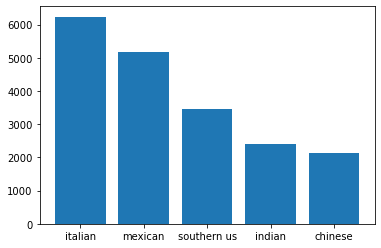


1600 1259 872 588 536


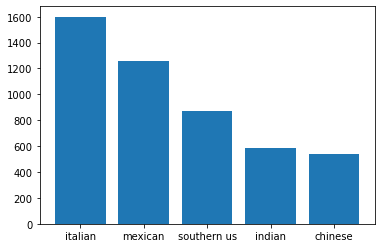

In [7]:
print_class_distribution(train_filepath)
print()
print_class_distribution(test_filepath)

In [8]:
def plot_histograms_ingredients_word_counts(filepath):
    ingredients_word_counts = []
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for item in data:
            ingredients = item['ingredients'].split(' ')
            ingredients_word_counts.append(len(ingredients))
#     print(ingredients_word_counts)
    print('Median list of ingredients (in terms of word count):', np.median(np.array(ingredients_word_counts)))
    print('Average list of ingredients (in terms of word count):', np.mean(np.array(ingredients_word_counts)))
    print('Shortest list of ingredients (in terms of word count):', min(ingredients_word_counts))
    print('Longest list of ingredients (in terms of word count):', max(ingredients_word_counts))
    plt.figure(figsize=(15, 6), dpi=80)
    plt.hist(ingredients_word_counts, bins=25)
    plt.show()

Median list of ingredients (in terms of word count): 20.0
Average list of ingredients (in terms of word count): 20.426378946284185
Shortest list of ingredients (in terms of word count): 1
Longest list of ingredients (in terms of word count): 136


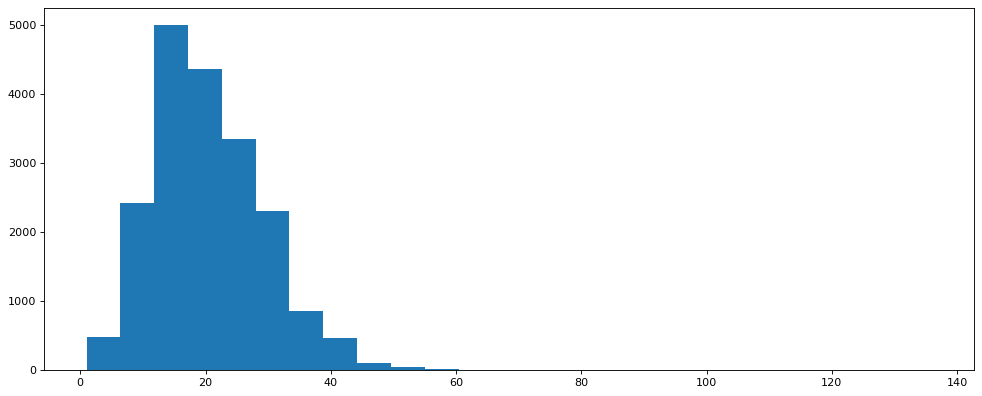


Median list of ingredients (in terms of word count): 19.0
Average list of ingredients (in terms of word count): 20.510607621009267
Shortest list of ingredients (in terms of word count): 2
Longest list of ingredients (in terms of word count): 102


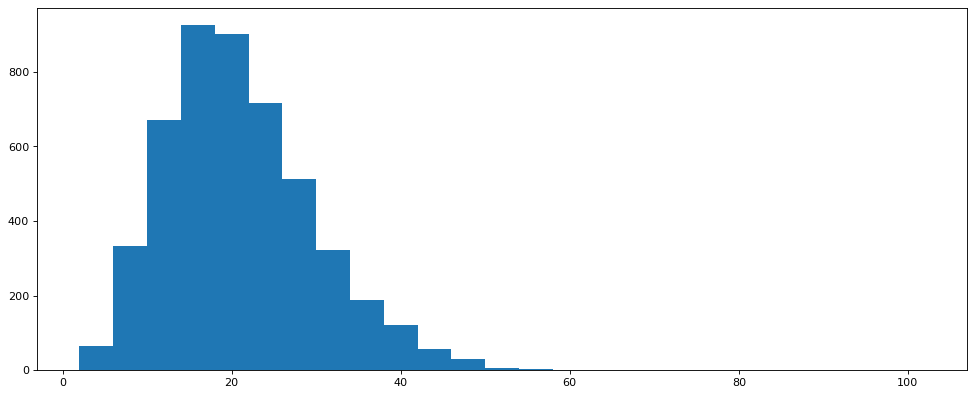

In [9]:
plot_histograms_ingredients_word_counts(train_filepath)
print()
plot_histograms_ingredients_word_counts(test_filepath)

In [45]:
def print_unique_ingredients(filepath):
    unique_ingredients = []
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for item in data:
            ingredients = item['ingredients'].split(' ')
            for ingredient in ingredients:
                if ingredient not in unique_ingredients:
                    unique_ingredients.append(ingredient)
    print(len(unique_ingredients), unique_ingredients)

In [46]:
print_unique_ingredients(train_filepath)
print('\n\n\n')
print_unique_ingredients(test_filepath)

2792 ['molasses', 'ginger', 'garlic', 'cloves', 'sesame', 'oil', 'rice', 'vinegar', 'steak', 'jalapeno', 'chilies', 'navel', 'oranges', 'corn', 'starch', 'low', 'sodium', 'soy', 'sauce', 'red', 'pepper', 'flakes', 'scallions', 'canola', 'pesto', 'ground', 'black', 'salt', 'rocket', 'leaves', 'white', 'wine', 'cannellini', 'beans', 'crumbled', 'goat', 'cheese', 'andouille', 'chicken', 'sausage', 'penne', 'pasta', 'grape', 'tomatoes', 'olive', 'green', 'bell', 'light', 'mayonnaise', 'sour', 'cream', 'water', 'onions', 'cheddar', 'lean', 'beef', 'biscuit', 'mix', 'roma', 'taco', 'seasoning', 'dry', 'sherry', 'peanut', 'seeds', 'maple', 'syrup', 'boneless', 'skinless', 'breast', 'halves', 'leaf', 'lettuce', 'chinese', 'five-spice', 'powder', 'fresh', 'root', 'all-purpose', 'flour', 'vegetable', 'italian', 'feta', 'freshly', 'cabbage', 'arborio', 'shallots', 'artichok', 'heart', 'marin', 'asiago', 'broth', 'butter', 'lamb', 'tortillas', 'margarine', 'cold', 'grated', 'parmesan', 'dried', 't

1993 ['pepper', 'chicken', 'breasts', 'dried', 'tarragon', 'leaves', 'cooking', 'spray', 'oil', 'capers', 'olive', 'kalamata', 'pizza', 'crust', 'dry', 'white', 'wine', 'golden', 'brown', 'sugar', 'salt', 'fresh', 'lime', 'juice', 'granny', 'smith', 'apples', 'peeled', 'ginger', 'ground', 'cardamom', 'serrano', 'chile', 'quinces', 'coriander', 'medjool', 'date', 'water', 'apple', 'cider', 'vinegar', 'cinnamon', 'sticks', 'oregano', 'black', 'onions', 'tomato', 'paste', 'diced', 'tomatoes', 'kosher', 'large', 'garlic', 'cloves', 'spaghetti', 'rosemary', 'parmesan', 'cheese', 'sliced', 'mushrooms', 'baby', 'spinach', 'cooked', 'shrimp', 'Alfredo', 'sauce', 'vegetable', 'broth', 'pesto', 'paprika', 'ravioli', 'baking', 'powder', 'beets', 'buttermilk', 'unsalted', 'butter', 'all-purpose', 'flour', 'jalapeno', 'chilies', 'cilantro', 'monterey', 'jack', 'chorizo', 'tequila', 'chili', 'cumin', 'rice', 'turmeric', 'curry', 'peppercorns', 'cayenne', 'stew', 'meat', 'self', 'rising', 'bacon', 'b

In [50]:
# TODO make a histogram of frequency distribution of words ?

In [52]:
# TODO preprocessing (ideas):
# - make everything lowercase
# - remove punctuation? such as: ! ( ) ® ™
#   - maybe not ™ because there might be a difference between e.g. 'Sides™' and 'Sides'
# - remove numbers? (maybe not because when they appear as 2-grams it could provide useful information: 
#   e.g. 2 chillies (common in italian cuisine) vs 20 chillies (more common in mexican cuisine))
# - 
# - shuffle shuffle shuffle!

